Epoch 1
Weight Gradient:
 [[ 4.059713   -2.016377   -2.0433352 ]
 [ 1.8586555  -0.94264364 -0.9160117 ]]
Bias Gradient:
 [ 0.6502732  -0.34044415 -0.30982888]
Loss: 4.4887

Epoch 2
Weight Gradient:
 [[ 3.5092797  -1.982851   -1.5264285 ]
 [ 1.5370735  -0.92081535 -0.6162581 ]]
Bias Gradient:
 [ 0.5493349  -0.3338805  -0.21545437]
Loss: 3.0382

Epoch 3
Weight Gradient:
 [[ 1.7597656  -1.8746303   0.11486443]
 [ 0.57995874 -0.85321224  0.27325344]]
Bias Gradient:
 [ 0.24313492 -0.31332478  0.07018985]
Loss: 2.1450

Epoch 4
Weight Gradient:
 [[ 0.94180995 -1.659657    0.71784693]
 [ 0.15169084 -0.7222588   0.57056785]]
Bias Gradient:
 [ 0.10361498 -0.27326947  0.1696545 ]
Loss: 1.7986

Epoch 5
Weight Gradient:
 [[ 0.7709006  -1.2543037   0.483403  ]
 [ 0.05617215 -0.48076534  0.42459315]]
Bias Gradient:
 [ 0.0732024  -0.19902092  0.12581849]
Loss: 1.5706

Epoch 6
Weight Gradient:
 [[ 0.52227056 -0.7592709   0.23700026]
 [-0.07728473 -0.19683665  0.2741214 ]]
Bias Gradient:
 [ 0.03008118 -

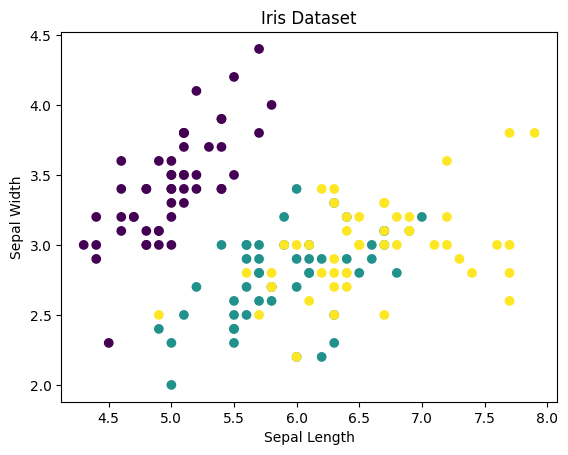

In [3]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris Dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only Sepal length and width
y = iris.target.reshape(-1, 1)

# One-hot encode labels (corrected)
encoder = OneHotEncoder(sparse_output=False)   # FIXED
y_onehot = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

# Convert to TensorFlow tensors
X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)

# Simple Softmax Regression Model
class IrisModel(tf.Module):
    def __init__(self):
        self.W = tf.Variable(tf.random.normal([2, 3]), name='weights')
        self.b = tf.Variable(tf.zeros([3]), name='bias')

    def __call__(self, x):
        return tf.nn.softmax(tf.matmul(x, self.W) + self.b)

# Loss Function (Categorical Crossentropy)
def loss_fn(y_pred, y_true):
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred + 1e-8), axis=1))

# Training loop using GradientTape
model = IrisModel()
optimizer = tf.optimizers.SGD(learning_rate=0.05)

for epoch in range(50):
    with tf.GradientTape() as tape:
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

    # Compute gradients
    gradients = tape.gradient(loss, [model.W, model.b])

    # Print gradients
    print(f"Epoch {epoch + 1}")
    print("Weight Gradient:\n", gradients[0].numpy())
    print("Bias Gradient:\n", gradients[1].numpy())
    print(f"Loss: {loss.numpy():.4f}\n")

    # Apply gradients
    optimizer.apply_gradients(zip(gradients, [model.W, model.b]))

print("\nTraining completed!")

# Plot Sepal Length vs Sepal Width
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset")
plt.show()
